In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [31]:
customer_df= pd.read_csv("we_fn_use_c_marketing_customer_value_analysis.csv")
display(customer_df.shape)
customer_df.head()

(9134, 24)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [32]:
print(customer_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [33]:
cols = []
for i in range(len(customer_df.columns)):
    cols.append(customer_df.columns[i].lower().replace(' ', '_'))
customer_df.columns = cols

print(customer_df.columns)

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')


In [34]:
print(customer_df.head())



  customer       state  customer_lifetime_value response  coverage education  \
0  BU79786  Washington              2763.519279       No     Basic  Bachelor   
1  QZ44356     Arizona              6979.535903       No  Extended  Bachelor   
2  AI49188      Nevada             12887.431650       No   Premium  Bachelor   
3  WW63253  California              7645.861827       No     Basic  Bachelor   
4  HB64268  Washington              2813.692575       No     Basic  Bachelor   

  effective_to_date employmentstatus gender  income  ...  \
0           2/24/11         Employed      F   56274  ...   
1           1/31/11       Unemployed      F       0  ...   
2           2/19/11         Employed      F   48767  ...   
3           1/20/11       Unemployed      M       0  ...   
4            2/3/11         Employed      M   43836  ...   

  months_since_policy_inception number_of_open_complaints  number_of_policies  \
0                             5                         0                   1

In [35]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])

customer_df.dtypes
customer_df

C:\Users\Alex\AppData\Local\Temp\ipykernel_199408\4144812956.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])


,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [36]:
numerical_df = customer_df.select_dtypes(np.number)
numerical_df.head()



,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [37]:
customer_df.nunique()

customer                         9134
state                               5
customer_lifetime_value          8041
response                            2
coverage                            3
education                           5
effective_to_date                  59
employmentstatus                    5
gender                              2
income                           5694
location_code                       3
marital_status                      3
monthly_premium_auto              202
months_since_last_claim            36
months_since_policy_inception     100
number_of_open_complaints           6
number_of_policies                  9
policy_type                         3
policy                              9
renew_offer_type                    4
sales_channel                       4
total_claim_amount               5106
vehicle_class                       6
vehicle_size                        3
dtype: int64

In [38]:
def categorize_variables(df):
    continuous_vars = []
    discrete_vars = []

    for column in df.columns:
        if df[column].nunique() > 10:  # You can adjust the threshold based on your dataset
            continuous_vars.append(column)
        else:
            discrete_vars.append(column)

    return continuous_vars, discrete_vars

# Apply the function to the numerical_df
continuous_df_vars, discrete_df_vars = categorize_variables(numerical_df)

# Create DataFrames for continuous and discrete variables
continuous_df = numerical_df[continuous_df_vars]
discrete_df = numerical_df[discrete_df_vars]

# Display the first few rows of each DataFrame
print("Continuous DataFrame:")
print(continuous_df.head())

print("\nDiscrete DataFrame:")
print(discrete_df.head())


Continuous DataFrame:
   customer_lifetime_value  income  monthly_premium_auto  \
0              2763.519279   56274                    69   
1              6979.535903       0                    94   
2             12887.431650   48767                   108   
3              7645.861827       0                   106   
4              2813.692575   43836                    73   

   months_since_last_claim  months_since_policy_inception  total_claim_amount  
0                       32                              5          384.811147  
1                       13                             42         1131.464935  
2                       18                             38          566.472247  
3                       18                             65          529.881344  
4                       12                             44          138.130879  

Discrete DataFrame:
   number_of_open_complaints  number_of_policies
0                          0                   1
1                 

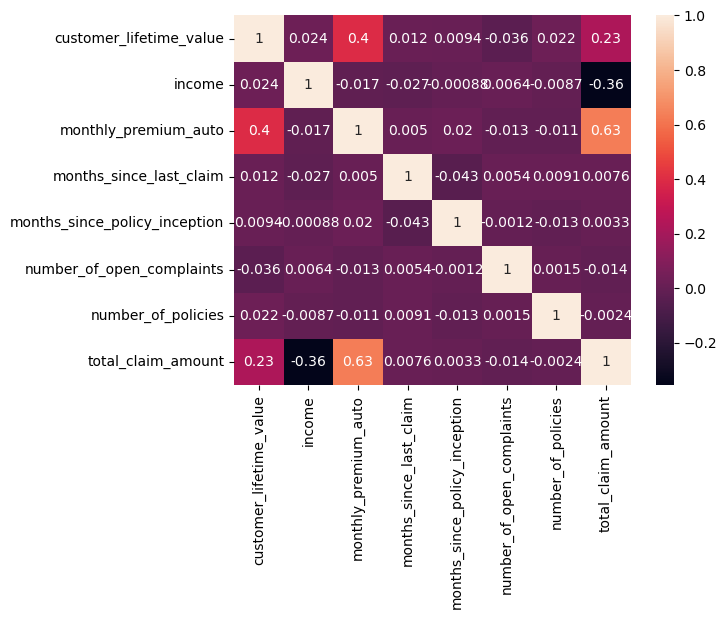

In [39]:
correlations_matrix = numerical_df.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [40]:
# total_claim_amount and monthly_premium_auto have the highest correlation

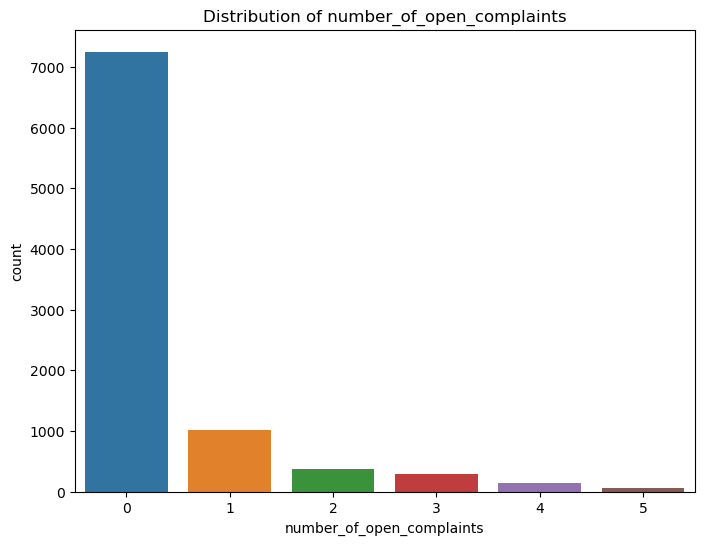

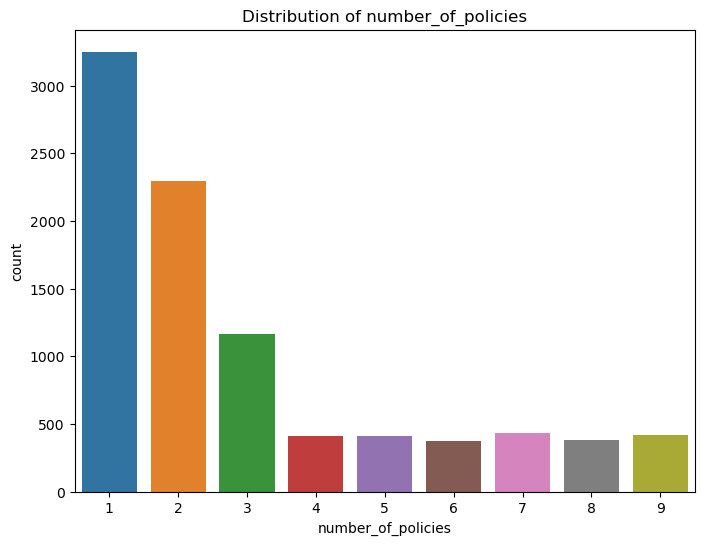

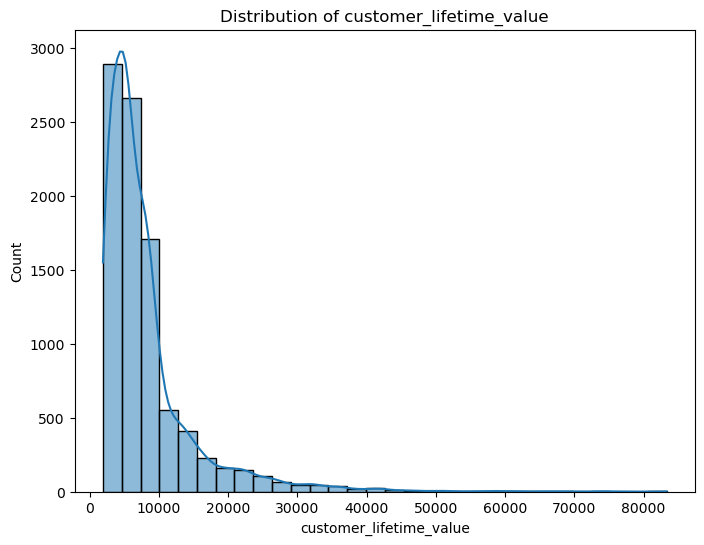

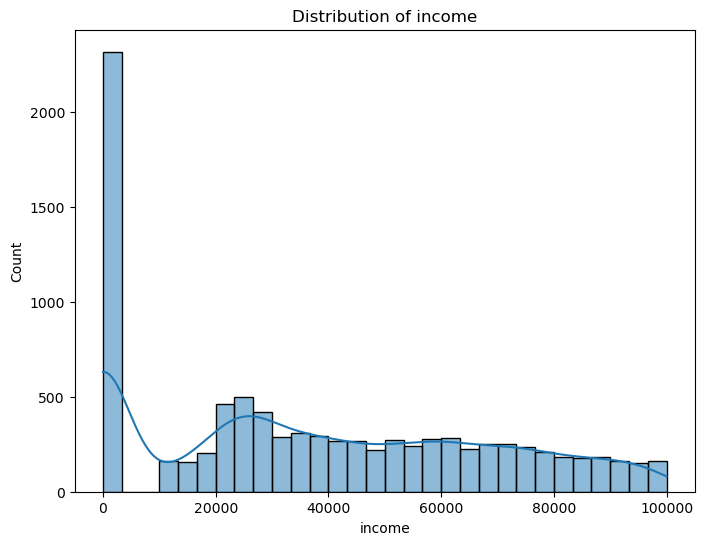

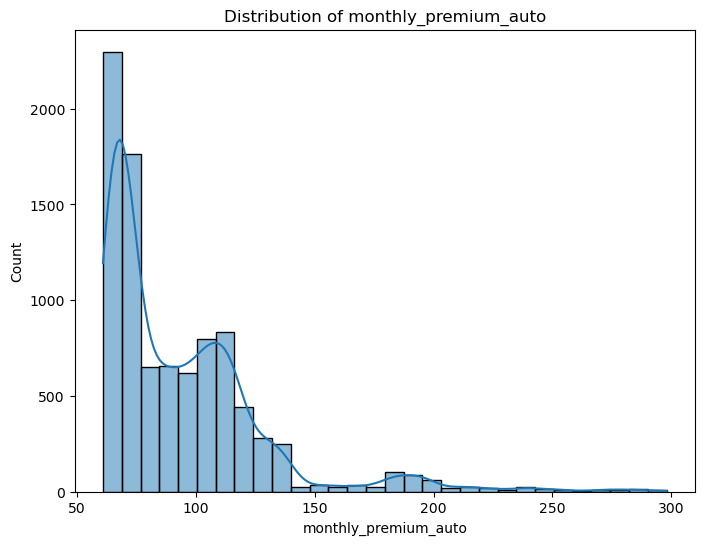

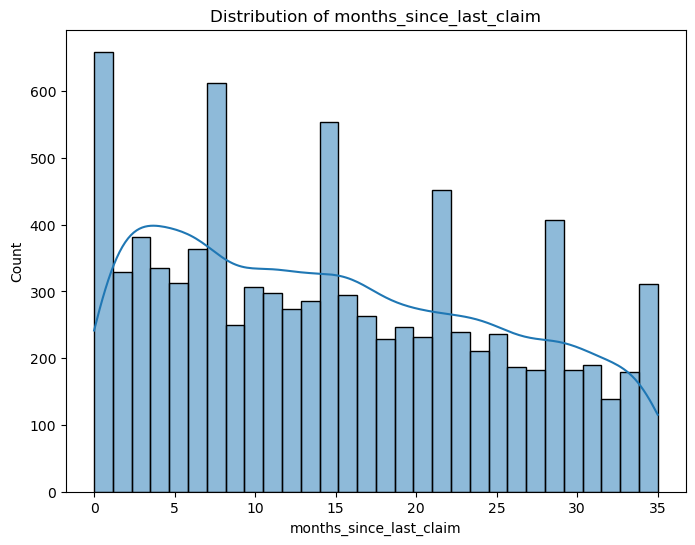

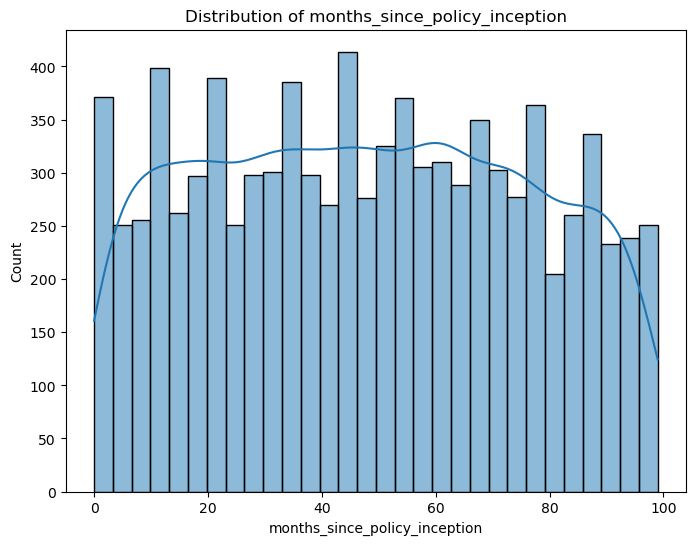

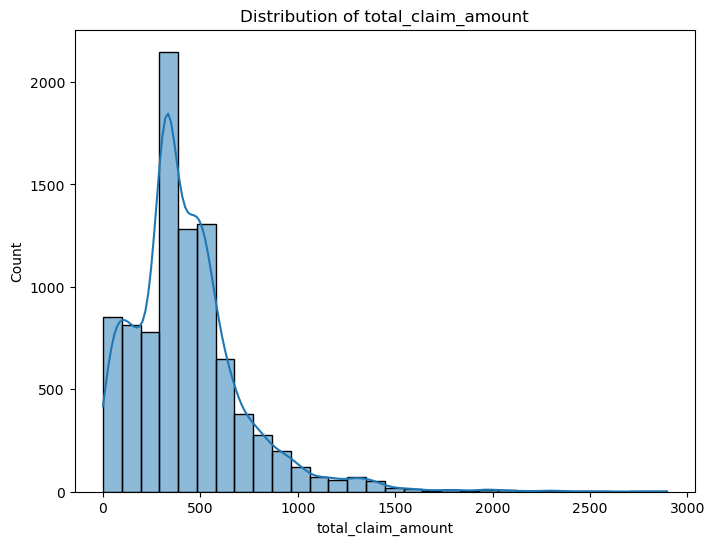

In [41]:
def plot_discrete_variables(df):
    for column in df.columns:
        plt.figure(figsize=(8, 6))
        sns.countplot(x=column, data=df)
        plt.title(f'Distribution of {column}')
        plt.show()

def plot_continuous_variables(df):
    for column in df.columns:
        plt.figure(figsize=(8, 6))
        sns.histplot(df[column], bins=30, kde=True)
        plt.title(f'Distribution of {column}')
        plt.show()

plot_discrete_variables(discrete_df)
plot_continuous_variables(continuous_df)


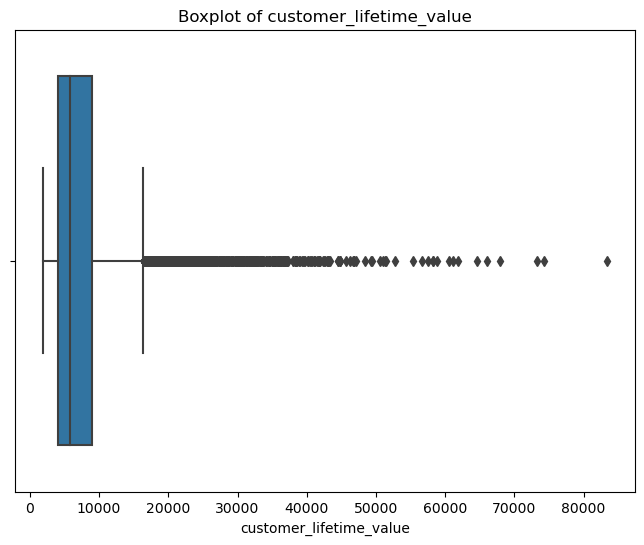

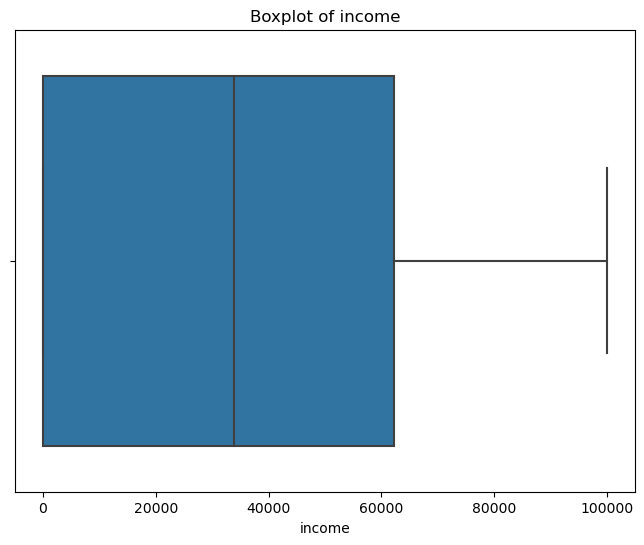

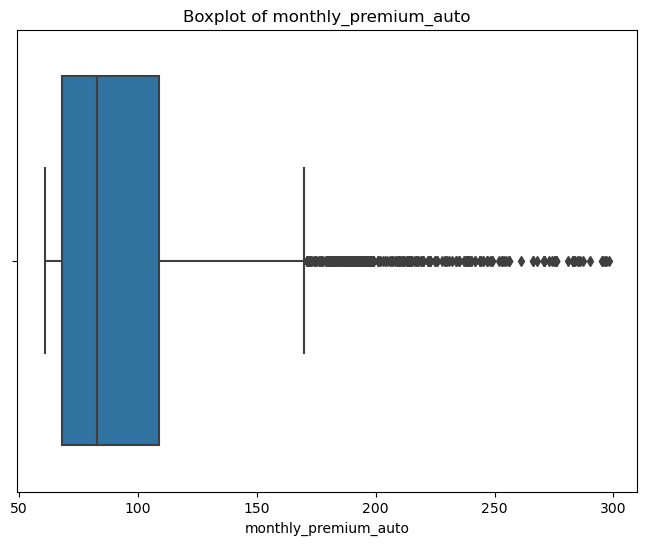

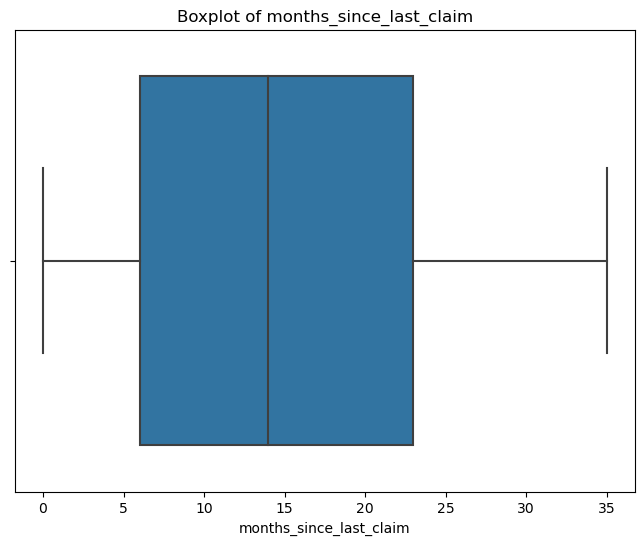

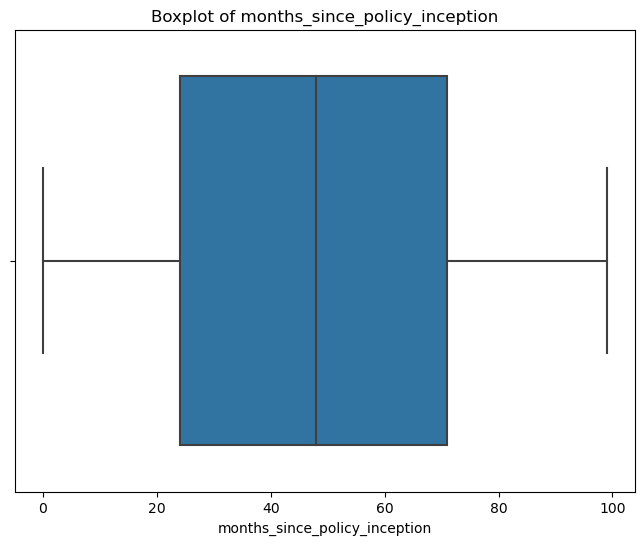

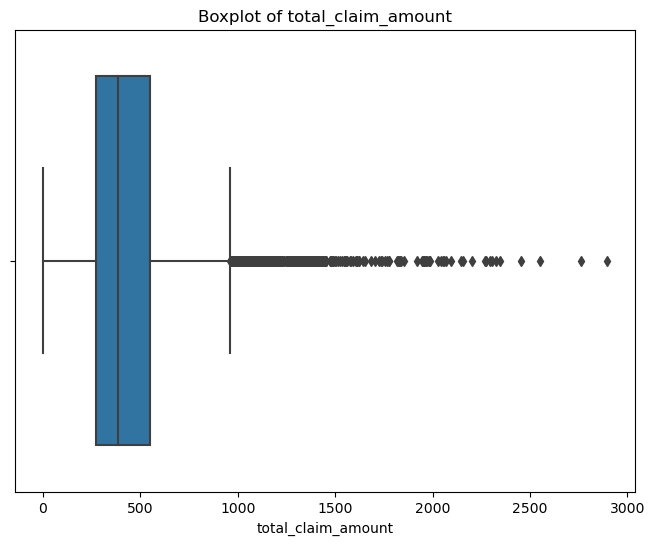

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_boxplots(df):
    for column in df.columns:
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=df[column])
        plt.title(f'Boxplot of {column}')
        plt.show()

# Example usage
plot_boxplots(continuous_df)



In [43]:
# Outlier removal
def remove_outliers(df):
    for column in df.columns:
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Remove outliers from continuous variables
numerical_df = remove_outliers(numerical_df)
numerical_df


# Saving to CSV
numerical_df.to_csv('numerical.csv', index=False)

In [44]:
categorical_df = customer_df.select_dtypes(object)
categorical_df.head()


,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [45]:
nan_counts = customer_df.isnull().sum()

print("NaN Counts:")
print(nan_counts)



NaN Counts:
customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64


In [46]:
customer_df.nunique()


customer                         9134
state                               5
customer_lifetime_value          8041
response                            2
coverage                            3
education                           5
effective_to_date                  59
employmentstatus                    5
gender                              2
income                           5694
location_code                       3
marital_status                      3
monthly_premium_auto              202
months_since_last_claim            36
months_since_policy_inception     100
number_of_open_complaints           6
number_of_policies                  9
policy_type                         3
policy                              9
renew_offer_type                    4
sales_channel                       4
total_claim_amount               5106
vehicle_class                       6
vehicle_size                        3
dtype: int64

In [47]:
column_dtypes = customer_df.dtypes

print("Data Types:")
print(column_dtypes)


Data Types:
customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel               

In [48]:
for column in customer_df.columns:
    unique_values = customer_df[column].unique()
    mixed_data_types = any(isinstance(value, str) and any(c.isalpha() for c in value) for value in unique_values)
    
    if mixed_data_types:
        print(f"Column '{column}' contains mixed alphanumeric data.")


Column 'customer' contains mixed alphanumeric data.
Column 'state' contains mixed alphanumeric data.
Column 'response' contains mixed alphanumeric data.
Column 'coverage' contains mixed alphanumeric data.
Column 'education' contains mixed alphanumeric data.
Column 'employmentstatus' contains mixed alphanumeric data.
Column 'gender' contains mixed alphanumeric data.
Column 'location_code' contains mixed alphanumeric data.
Column 'marital_status' contains mixed alphanumeric data.
Column 'policy_type' contains mixed alphanumeric data.
Column 'policy' contains mixed alphanumeric data.
Column 'renew_offer_type' contains mixed alphanumeric data.
Column 'sales_channel' contains mixed alphanumeric data.
Column 'vehicle_class' contains mixed alphanumeric data.
Column 'vehicle_size' contains mixed alphanumeric data.


In [49]:
categorical_df.drop(columns=['customer'], inplace=True, axis=1)


In [50]:
categorical_df.head()


,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [51]:
# Mapping function to extract the policy type
def map_policy(value):
    if 'L1' in value:
        return 'L1'
    elif 'L2' in value:
        return 'L2'
    elif 'L3' in value:
        return 'L3'

# Apply the mapping function to the "policy" column in the main DataFrame
categorical_df['policy'] = categorical_df['policy'].apply(map_policy)

# Display the updated DataFrame
print(categorical_df['policy'].value_counts())


policy
L3    4588
L2    2881
L1    1665
Name: count, dtype: int64


In [52]:
# Display the number of unique values in each column
unique_value_counts = categorical_df.nunique()

# Print the unique value counts
print("Number of Unique Values in Each Column:")
print(unique_value_counts)


Number of Unique Values in Each Column:
state               5
response            2
coverage            3
education           5
employmentstatus    5
gender              2
location_code       3
marital_status      3
policy_type         3
policy              3
renew_offer_type    4
sales_channel       4
vehicle_class       6
vehicle_size        3
dtype: int64


In [53]:
def map_employmentstatus(value):
    if 'Medical Leave' in value:
        return 'Not Working'
    elif 'Disabled' in value:
        return 'Not Working'
    elif 'Retired' in value:
        return 'Not Working'
    else: 
        return value
    
# Apply the mapping function to the "policy" column
categorical_df['employmentstatus'] = categorical_df['employmentstatus'].apply(map_employmentstatus)
categorical_df


display(categorical_df['employmentstatus'].value_counts(dropna=False))

employmentstatus
Employed       5698
Unemployed     2317
Not Working    1119
Name: count, dtype: int64

In [54]:
for col in categorical_df.columns:
    print(categorical_df[col].value_counts(dropna=False))

state
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: count, dtype: int64
response
No     7826
Yes    1308
Name: count, dtype: int64
coverage
Basic       5568
Extended    2742
Premium      824
Name: count, dtype: int64
education
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: count, dtype: int64
employmentstatus
Employed       5698
Unemployed     2317
Not Working    1119
Name: count, dtype: int64
gender
F    4658
M    4476
Name: count, dtype: int64
location_code
Suburban    5779
Rural       1773
Urban       1582
Name: count, dtype: int64
marital_status
Married     5298
Single      2467
Divorced    1369
Name: count, dtype: int64
policy_type
Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: count, dtype: int64
policy
L3    4588
L2    2881
L1    1665
Name: count, dtype: int64
renew_offer_type
Offer1    3752
Off

In [55]:
def map_vehicleclass(value):
    if 'Sports Car' in value:
        return 'Luxury'
    elif 'Luxury SUV' in value:
        return 'Luxury'
    elif 'Luxury Car' in value:
        return 'Luxury'
    else: 
        return value
    
categorical_df['vehicle_class'] = categorical_df['vehicle_class'].apply(map_vehicleclass)
categorical_df


display(categorical_df['vehicle_class'].value_counts(dropna=False))

vehicle_class
Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Luxury            831
Name: count, dtype: int64

In [56]:
categorical_df.to_csv('categorical.csv', index=False)

In [57]:
customer_df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


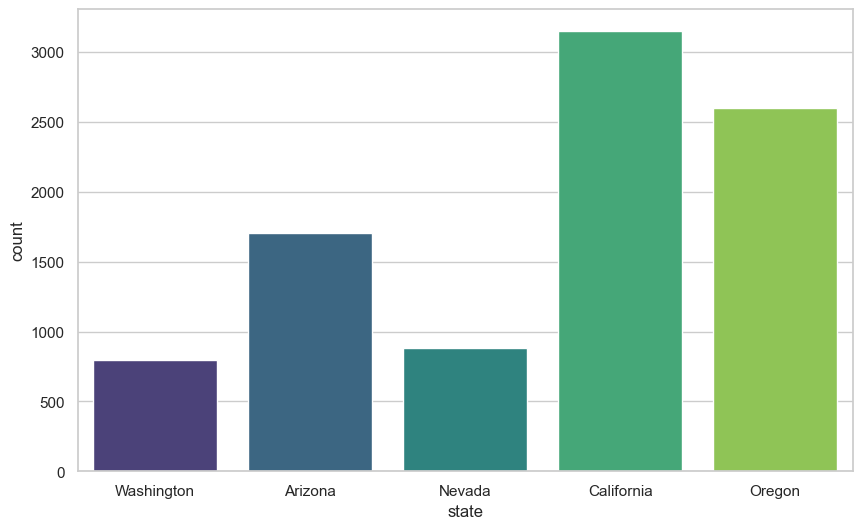

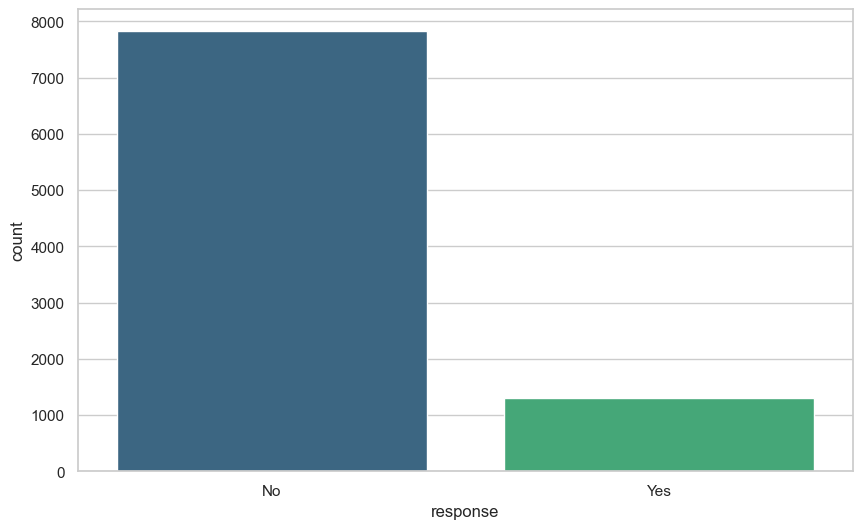

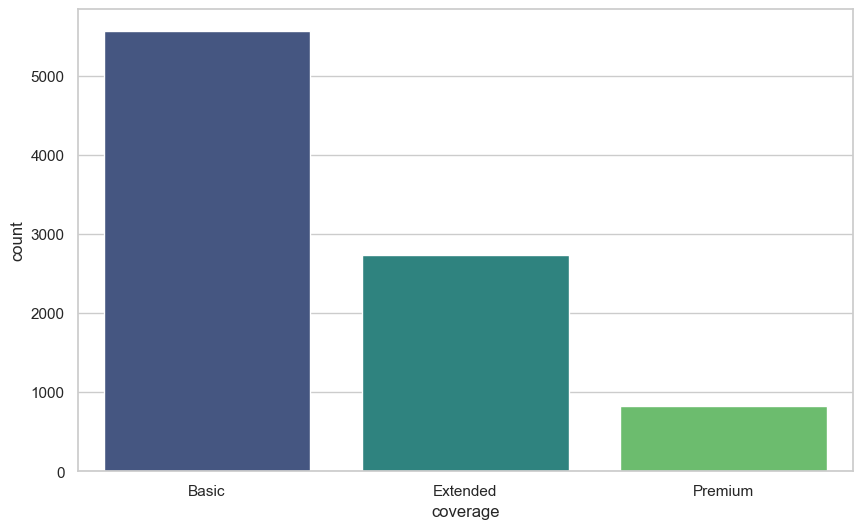

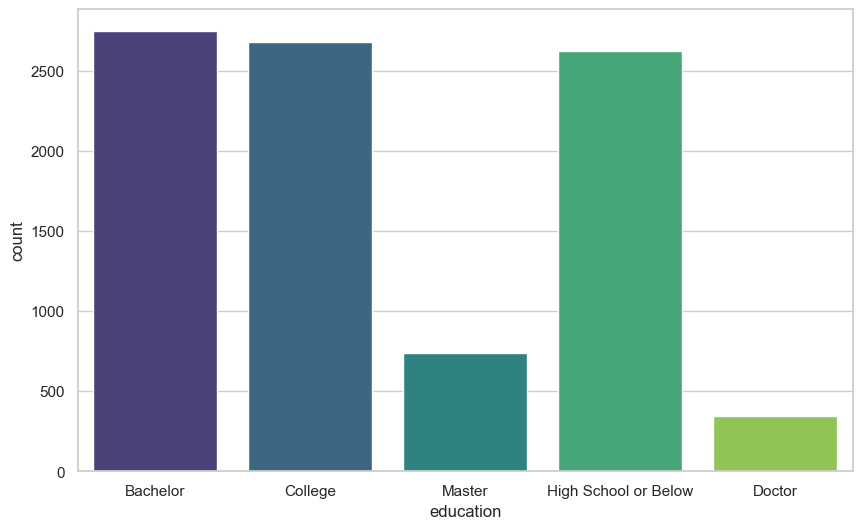

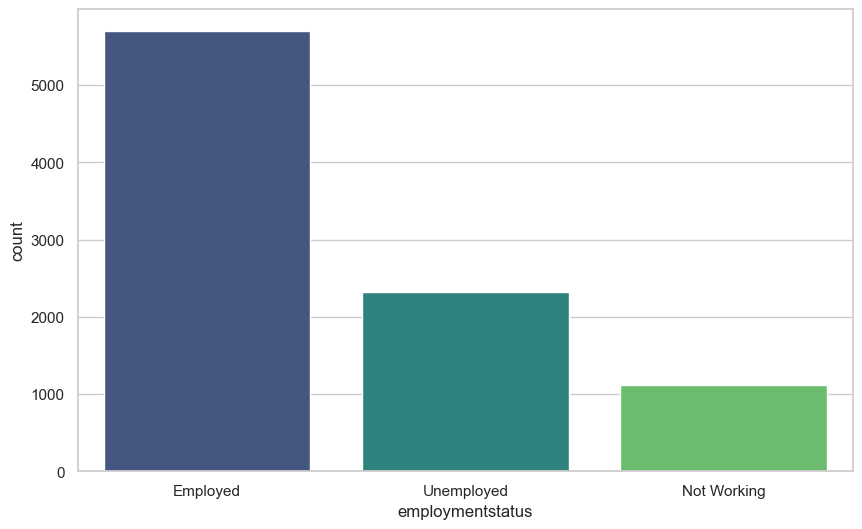

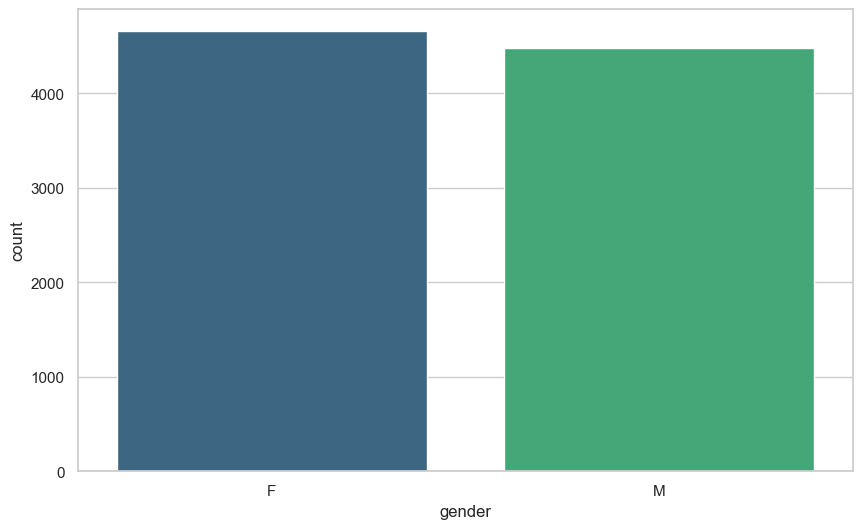

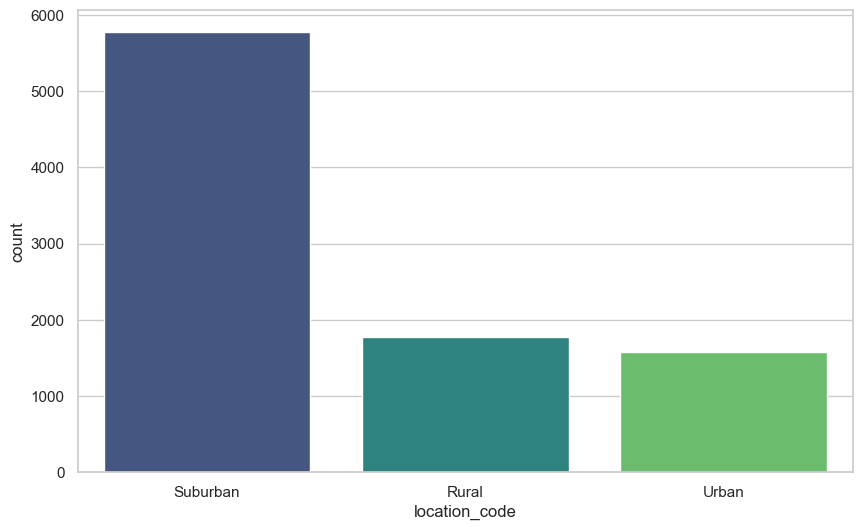

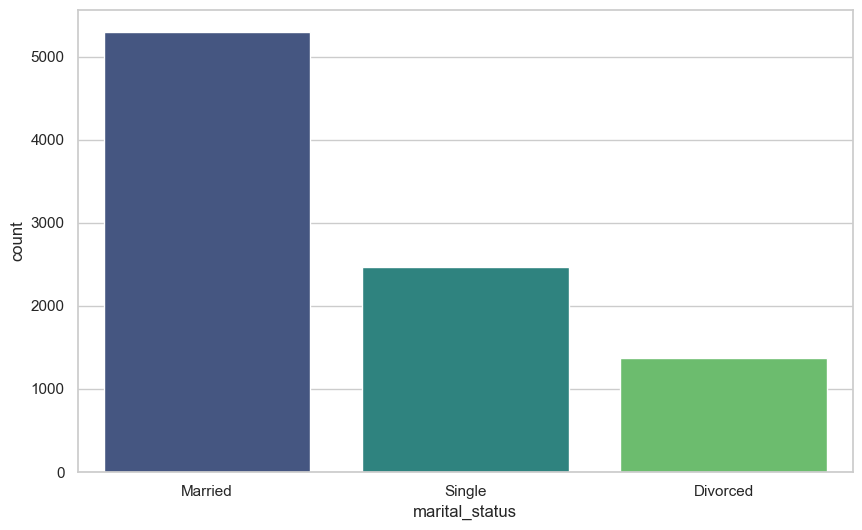

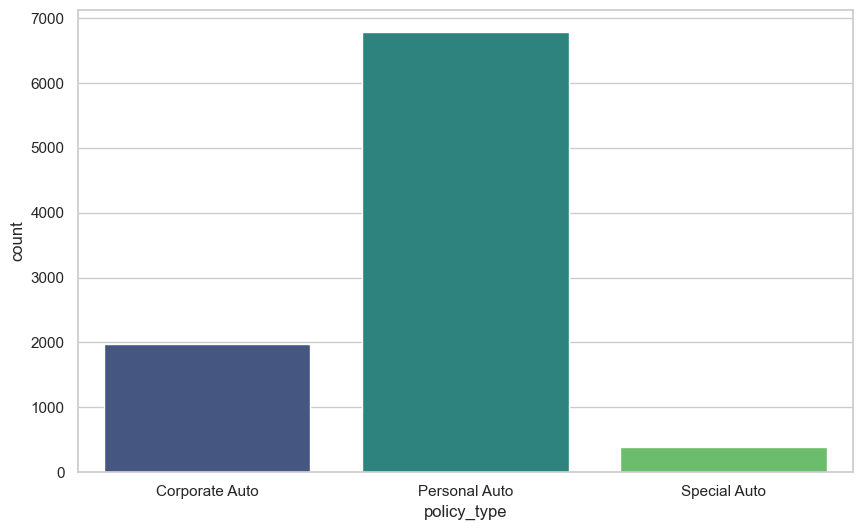

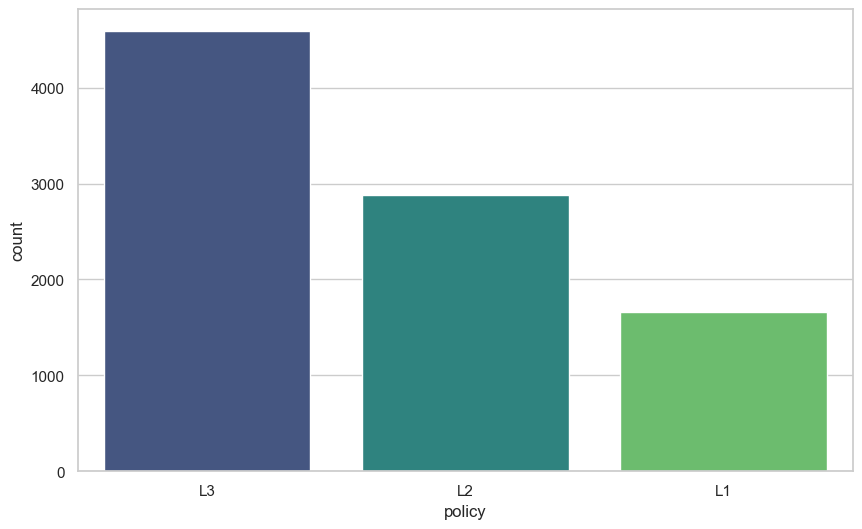

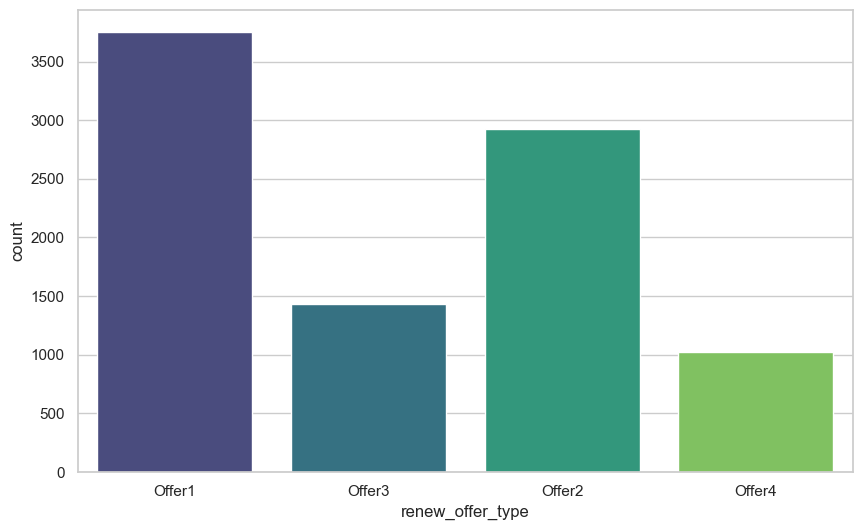

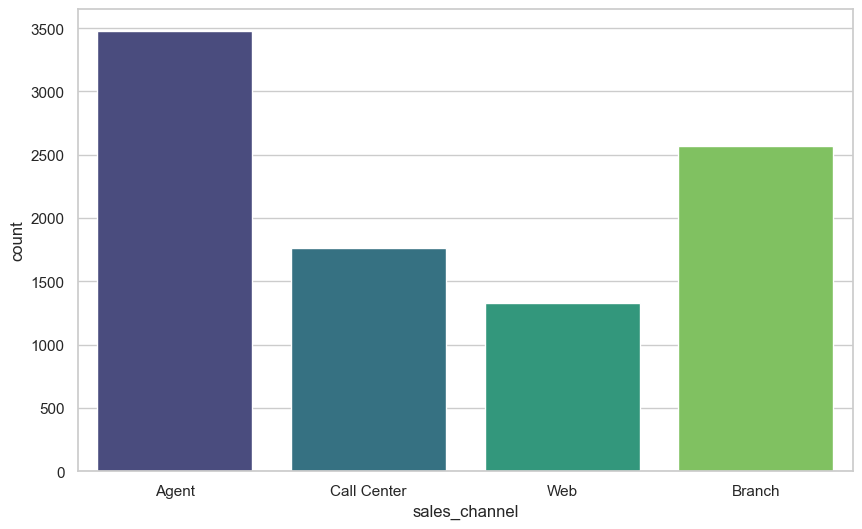

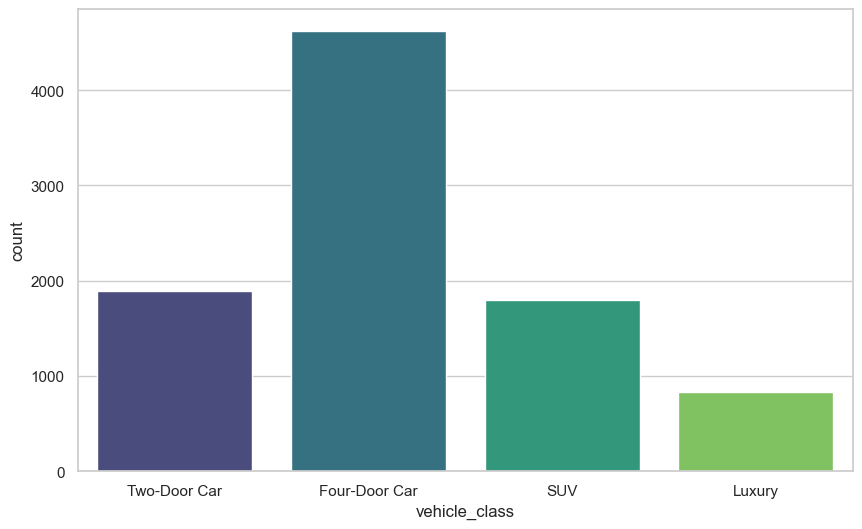

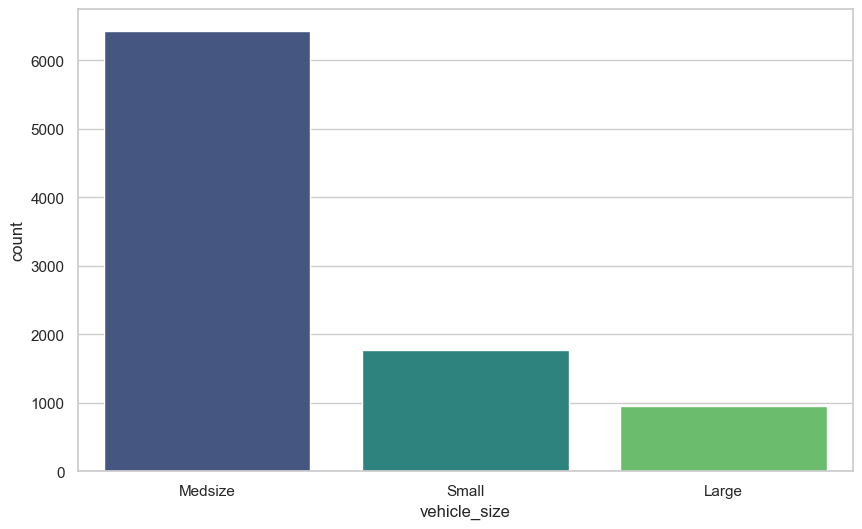

In [58]:

sns.set(style="whitegrid")

# Plot bar plots for each categorical variable
for column in categorical_df.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, data=categorical_df, palette="viridis")
    
    
    plt.show()


<Axes: xlabel='effective_to_date', ylabel='count'>

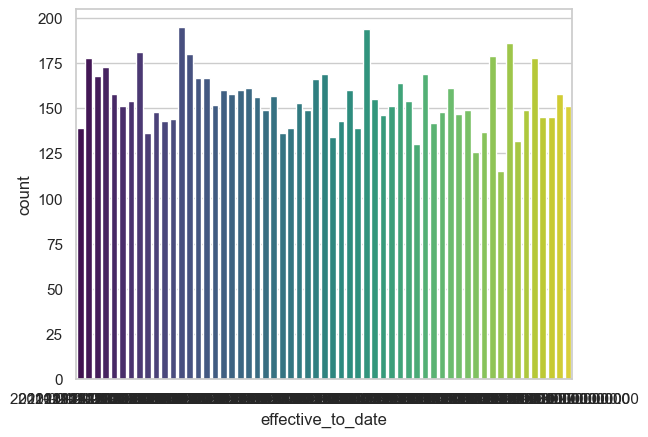

In [59]:
    sns.countplot(x="effective_to_date", data=customer_df, palette="viridis")


In [60]:
# Assuming your DataFrame is named categorical_df
# Replace 'column1', 'column2', etc. with the actual column names in your DataFrame

for column in categorical_df.columns:
    print(f"Value counts for {column}:\n{categorical_df[column].value_counts()}\n")


Value counts for state:
state
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: count, dtype: int64

Value counts for response:
response
No     7826
Yes    1308
Name: count, dtype: int64

Value counts for coverage:
coverage
Basic       5568
Extended    2742
Premium      824
Name: count, dtype: int64

Value counts for education:
education
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: count, dtype: int64

Value counts for employmentstatus:
employmentstatus
Employed       5698
Unemployed     2317
Not Working    1119
Name: count, dtype: int64

Value counts for gender:
gender
F    4658
M    4476
Name: count, dtype: int64

Value counts for location_code:
location_code
Suburban    5779
Rural       1773
Urban       1582
Name: count, dtype: int64

Value counts for marital_status:
marital_status
Married     5298
Single      2467
Divorced    1

In [61]:
# There is no redudant columns 

In [62]:
customer_df['Month']=customer_df["effective_to_date"]. dt. month

In [63]:
customer_df['Month'].value_counts()

Month
1    4898
2    4236
Name: count, dtype: int64

<Axes: xlabel='Month', ylabel='count'>

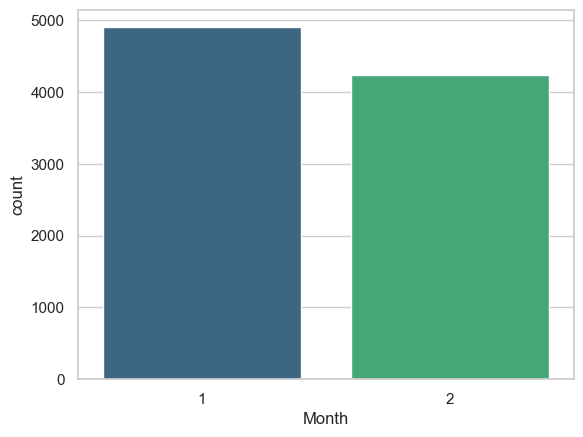

In [64]:
    sns.countplot(x="Month", data=customer_df, palette="viridis")


In [70]:
from sklearn.model_selection import train_test_split

# Assuming 'customer_df' is your DataFrame
# Replace it with the actual name of your DataFrame

# Separate features (X) and target variable (y)
X = customer_df.drop('total_claim_amount', axis=1)  # Features excluding the target variable
y = customer_df['total_claim_amount']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)



X_train shape: (7307, 24)
X_test shape: (1827, 24)
y_train shape: (7307,)
y_test shape: (1827,)


In [75]:
# Select numerical and categorical columns based on data types for X_train
numerical_columns_train = X_train.select_dtypes(include=['number']).columns.tolist()
categorical_columns_train = X_train.select_dtypes(include=['object']).columns.tolist()

# Separate numerical and categorical features in X_train
X_train_num = X_train[numerical_columns_train]
X_train_cat = X_train[categorical_columns_train]

# Select numerical and categorical columns based on data types for X_test
numerical_columns_test = X_test.select_dtypes(include=['number']).columns.tolist()
categorical_columns_test = X_test.select_dtypes(include=['object']).columns.tolist()

# Separate numerical and categorical features in X_test
X_test_num = X_test[numerical_columns_test]
X_test_cat = X_test[categorical_columns_test]

# Display the shapes of the resulting subsets
print("X_train_num shape:", X_train_num.shape)
print("X_train_cat shape:", X_train_cat.shape)
print("X_test_num shape:", X_test_num.shape)
print("X_test_cat shape:", X_test_cat.shape)


X_train_num shape: (7307, 8)
X_train_cat shape: (7307, 15)
X_test_num shape: (1827, 8)
X_test_cat shape: (1827, 15)


In [77]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on X_train_num and transform X_train_num
X_train_num_scaled = scaler.fit_transform(X_train_num)

# Transform X_test_num using the same scaler
X_test_num_scaled = scaler.transform(X_test_num)
